In [473]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [474]:
img = cv2.imread("images\shapes\\real3.jpg")

In [475]:
def process_img(img):
    sharp_kernel=np.array([[-1,-1,-1],
                            [-1,9,-1],
                            [-1,-1,-1]])
    median = cv2.medianBlur(img,7)
    gauss = cv2.GaussianBlur(median,(3,3),2)
    sharpened_frame=cv2.filter2D(gauss,-1,sharp_kernel)
    return sharpened_frame

In [476]:
def detect_contours(img,contours):
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        num_vertices = len(approx)

        if cv2.contourArea(contour) < 1000: # ignore noise
            continue

        if num_vertices == 3:
            cv2.drawContours(img,[contour],-1,(255,0,0),5)  # triangle
        elif num_vertices == 4:
            cv2.drawContours(img,[contour],-1,(0,255,0),5)  # square
        elif  num_vertices == 8:
            cv2.drawContours(img,[contour],-1,(0,0,255),5)  # circle
        elif num_vertices >8:
            cv2.drawContours(img,[contour],-1,(255,255,0),5)  # cross
            # print(num_vertices)
            


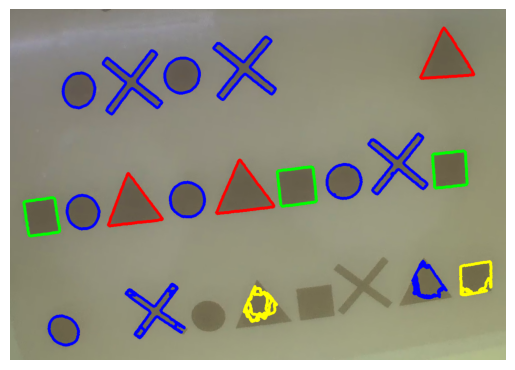

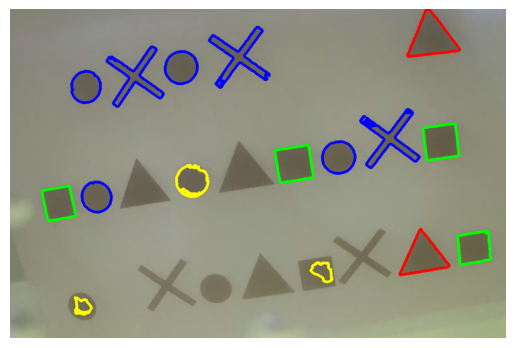

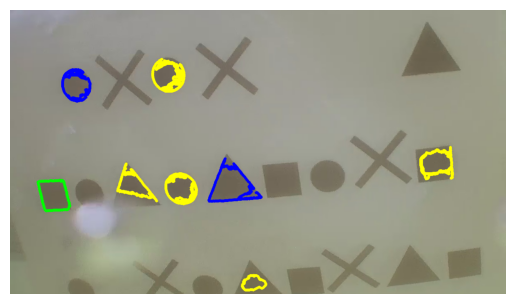

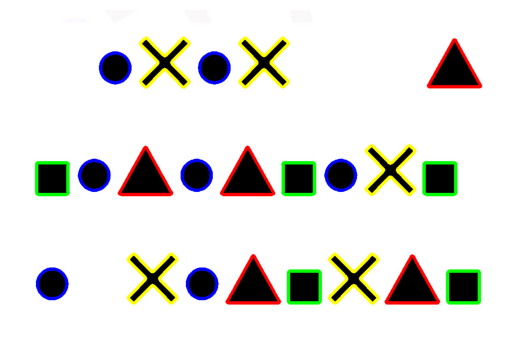

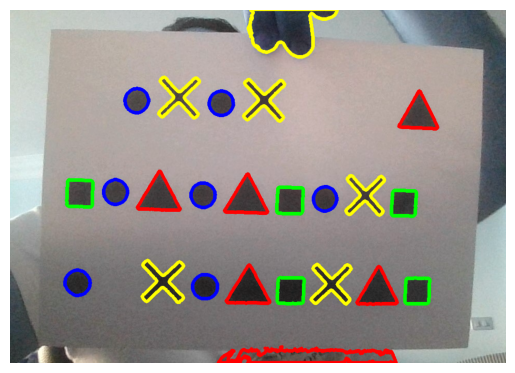

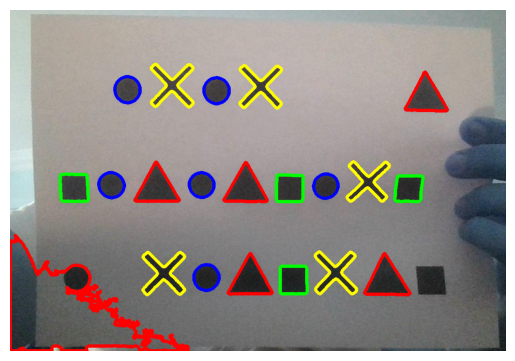

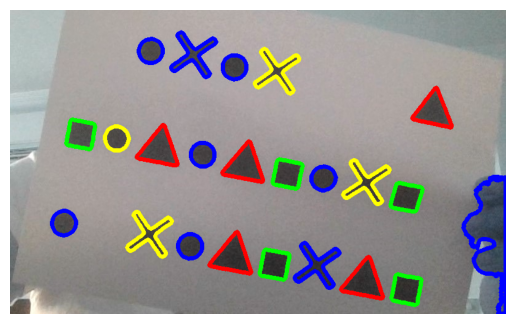

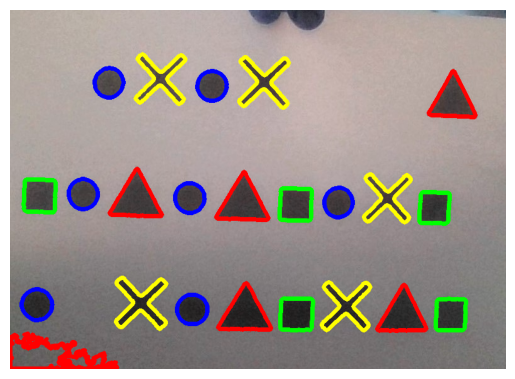

In [477]:
for img_name in os.listdir("images\shapes"):
    img = cv2.imread(f"images\shapes\\{img_name}")

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    processed_img = process_img(gray)

    thresh = cv2.threshold(processed_img, 100, 200, cv2.THRESH_BINARY_INV)[1]

    contours, _= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    detect_contours(img,contours)

    cv2.imwrite(f"images\output\\segmented{img_name}",img)



    plt.imshow(img)
    plt.axis("off")
    plt.show()